In [1]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv('train.csv')

0:	learn: 2.6023666	total: 804ms	remaining: 6m 41s
100:	learn: 1.3965961	total: 1m 19s	remaining: 5m 12s
200:	learn: 1.2843273	total: 2m 38s	remaining: 3m 55s
300:	learn: 1.2201498	total: 3m 57s	remaining: 2m 36s
400:	learn: 1.1755212	total: 5m 15s	remaining: 1m 17s
499:	learn: 1.1414569	total: 6m 33s	remaining: 0us


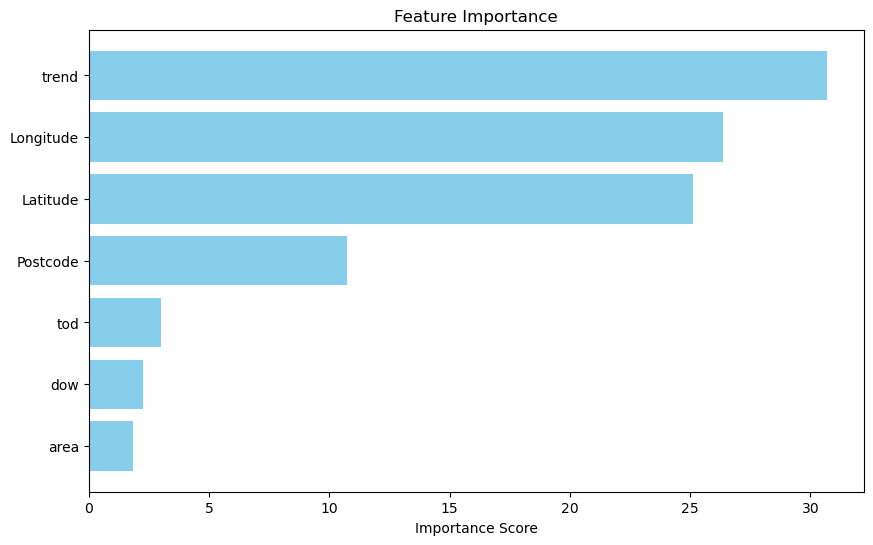

In [13]:
# Catboost has built-in feature importance
from catboost import CatBoostClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate Plug States for Classification
def concatenate_states(df):
    # Concatenate 'Available', 'Charging', 'Passive', 'Other' into a single string
    df['plug_state'] = df.apply(lambda row: f"{row['Available']}{row['Charging']}{row['Passive']}{row['Other']}", axis=1)
    return df

# Concatenate plug states for classification
data = concatenate_states(data)

# Prepare features and target
data['Postcode'] = data['Postcode'].astype(str)
data['area'] = data['area'].astype('category')

# Select relevant features for training
X = data[['tod', 'dow', 'trend', 'Latitude', 'Longitude', 'Postcode', 'area']]
y = data['plug_state']  # Target variable (concatenated plug states)

# Instantiate CatBoostClassifier
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, loss_function='MultiClass', task_type="GPU", verbose=100)

# Train the model with categorical features specified
model.fit(X, y, cat_features=['Postcode', 'area'])

# Retrieve feature importance scores
feature_importances = model.get_feature_importance()
feature_names = X.columns

# Create a DataFrame for feature importance scores
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [3]:
# Simple linear model benchmark with all features
# Benchmark Accuracy (Median Prediction): 0.3810
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Concatenate Plug States for Classification
def concatenate_states(df):
    df['plug_state'] = df.apply(lambda row: f"{row['Available']}{row['Charging']}{row['Passive']}{row['Other']}", axis=1)
    return df

# Function to calculate the median benchmark accuracy
def calculate_median_benchmark(y_train, y_test):
    # Get the most common class in the training set (mode)
    median_benchmark = y_train.mode()[0]
    # Predict this common class for all test samples
    y_pred_median = [median_benchmark] * len(y_test)
    # Calculate and return accuracy
    return accuracy_score(y_test, y_pred_median)

# Assuming 'data' is your DataFrame
data = concatenate_states(data)

# Prepare features and target for plug_state prediction
X = data[['tod', 'dow', 'trend', 'Latitude', 'Longitude', 'Postcode', 'area']]
y = data['plug_state']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['Postcode', 'area'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Calculate the median benchmark accuracy
median_accuracy = calculate_median_benchmark(y_train, y_test)
print(f'Benchmark Accuracy (Median Prediction): {median_accuracy:.4f}')

Benchmark Accuracy (Median Prediction): 0.3810


In [11]:
# Simple linear model for benchmark - take out 3 least important features
# Benchmark Accuracy (Median Prediction): 0.3810
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Concatenate Plug States for Classification
def concatenate_states(df):
    df['plug_state'] = df.apply(lambda row: f"{row['Available']}{row['Charging']}{row['Passive']}{row['Other']}", axis=1)
    return df

# Function to calculate the median benchmark accuracy
def calculate_median_benchmark(y_train, y_test):
    # Get the most common class in the training set (mode)
    median_benchmark = y_train.mode()[0]
    # Predict this common class for all test samples
    y_pred_median = [median_benchmark] * len(y_test)
    # Calculate and return accuracy
    return accuracy_score(y_test, y_pred_median)

# Assuming 'data' is your DataFrame
data = concatenate_states(data)

# Prepare features and target for plug_state prediction
X = data[['trend', 'Latitude', 'Longitude', 'Postcode']]
y = data['plug_state']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['Postcode'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Calculate the median benchmark accuracy
median_accuracy = calculate_median_benchmark(y_train, y_test)
print(f'Benchmark Accuracy (Median Prediction): {median_accuracy:.4f}')

Benchmark Accuracy (Median Prediction): 0.3810


In [3]:
# First model with all features included
# Accuracy of 0.5964 with 500 iterations
# Accuracy of 0.6286 with 1000 iterations
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Concatenate Plug States for Classification
def concatenate_states(df):
    # Concatenate 'Available', 'Charging', 'Passive', 'Other' into a single string
    df['plug_state'] = df.apply(lambda row: f"{row['Available']}{row['Charging']}{row['Passive']}{row['Other']}", axis=1)
    return df

# Concatenate plug states for classification
data = concatenate_states(data)

# Prepare features and target
# Cast 'Postcode' and 'area' to categorical
data['Postcode'] = data['Postcode'].astype(str)
data['area'] = data['area'].astype('category')

# Select relevant features for training
X = data[['tod', 'dow', 'trend', 'Latitude', 'Longitude', 'Postcode', 'area']]
y = data['plug_state']  # Target variable (concatenated plug states)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=100,
    task_type="GPU",
    allow_writing_files=False
)

# Train the model
model.fit(
    X_train, y_train,
    cat_features=['Postcode', 'area'],
    eval_set=(X_test, y_test),
    early_stopping_rounds=50,
    verbose=100
)

# Make Predictions and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

0:	learn: 2.6028506	test: 2.6016831	best: 2.6016831 (0)	total: 664ms	remaining: 11m 3s
100:	learn: 1.3921838	test: 1.3908272	best: 1.3908272 (100)	total: 1m 4s	remaining: 9m 32s
200:	learn: 1.2835878	test: 1.2832797	best: 1.2832797 (200)	total: 2m 7s	remaining: 8m 28s
300:	learn: 1.2202358	test: 1.2207298	best: 1.2207298 (300)	total: 3m 11s	remaining: 7m 25s
400:	learn: 1.1756866	test: 1.1768454	best: 1.1768454 (400)	total: 4m 15s	remaining: 6m 21s
500:	learn: 1.1400316	test: 1.1419525	best: 1.1419525 (500)	total: 5m 19s	remaining: 5m 17s
600:	learn: 1.1134338	test: 1.1160800	best: 1.1160800 (600)	total: 6m 22s	remaining: 4m 13s
700:	learn: 1.0910191	test: 1.0944577	best: 1.0944577 (700)	total: 7m 26s	remaining: 3m 10s
800:	learn: 1.0713339	test: 1.0757084	best: 1.0757084 (800)	total: 8m 29s	remaining: 2m 6s
900:	learn: 1.0553689	test: 1.0602821	best: 1.0602821 (900)	total: 9m 33s	remaining: 1m 2s
999:	learn: 1.0406431	test: 1.0462148	best: 1.0462148 (999)	total: 10m 36s	remaining: 0us

Hyperparameter Tuning

In [8]:
# Reduced depth to 4 from 6
# Accuracy decreased to 0.5519 with 500 iterations
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Concatenate Plug States for Classification
def concatenate_states(df):
    # Concatenate 'Available', 'Charging', 'Passive', 'Other' into a single string
    df['plug_state'] = df.apply(lambda row: f"{row['Available']}{row['Charging']}{row['Passive']}{row['Other']}", axis=1)
    return df

# Concatenate plug states for classification
data = concatenate_states(data)

# Prepare features and target
# Cast 'Postcode' and 'area' to categorical
data['Postcode'] = data['Postcode'].astype(str)
data['area'] = data['area'].astype('category')

# Select relevant features for training
X = data[['tod', 'dow', 'trend', 'Latitude', 'Longitude', 'Postcode', 'area']]
y = data['plug_state']  # Target variable (concatenated plug states)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier with adjusted hyperparameters
model = CatBoostClassifier(
    iterations=500,  
    learning_rate=0.1,
    depth=4,  # Reduced depth
    loss_function='MultiClass',
    verbose=100,
    task_type="GPU",
    allow_writing_files=False,
)

# Train the model
model.fit(
    X_train, y_train,
    cat_features=['Postcode', 'area'],
    eval_set=(X_test, y_test),
    early_stopping_rounds=50,
    verbose=100
)

# Make Predictions and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

0:	learn: 2.6248918	test: 2.6238412	best: 2.6238412 (0)	total: 588ms	remaining: 4m 53s
100:	learn: 1.5113211	test: 1.5089817	best: 1.5089817 (100)	total: 59s	remaining: 3m 53s
200:	learn: 1.4106010	test: 1.4089526	best: 1.4089526 (200)	total: 1m 57s	remaining: 2m 54s
300:	learn: 1.3528048	test: 1.3516087	best: 1.3516087 (300)	total: 2m 55s	remaining: 1m 56s
400:	learn: 1.3123637	test: 1.3115045	best: 1.3115045 (400)	total: 3m 54s	remaining: 57.9s
499:	learn: 1.2807176	test: 1.2800445	best: 1.2800445 (499)	total: 4m 52s	remaining: 0us
bestTest = 1.280044457
bestIteration = 499
Accuracy: 0.5519
              precision    recall  f1-score   support

        0003       0.73      0.79      0.76     73323
        0012       0.74      0.67      0.70       772
        0021       0.87      0.13      0.23       571
        0030       0.73      0.25      0.37      3423
        0102       0.75      0.03      0.05       112
        0111       0.88      0.37      0.52       388
        0120       0.

In [19]:
# Manually adjusted hyperparameters 
# Accuracy slightly decreased to 0.5943 with 500 iterations
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Concatenate Plug States for Classification
def concatenate_states(df):
    # Concatenate 'Available', 'Charging', 'Passive', 'Other' into a single string
    df['plug_state'] = df.apply(lambda row: f"{row['Available']}{row['Charging']}{row['Passive']}{row['Other']}", axis=1)
    return df

# Concatenate plug states for classification
data = concatenate_states(data)

# Prepare features and target
data['Postcode'] = data['Postcode'].astype(str)
data['area'] = data['area'].astype('category')

X = data[['tod', 'dow', 'trend', 'Latitude', 'Longitude', 'Postcode', 'area']]
y = data['plug_state']  # Target variable (concatenated plug states)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier with adjusted hyperparameters
model = CatBoostClassifier(
    iterations=500,         # Increased iterations for more training
    learning_rate=0.05,     # Adjusted learning rate for more gradual learning
    depth=8,                # Increased depth for a more complex model
    l2_leaf_reg=5,          # Added L2 regularization to reduce overfitting
    loss_function='MultiClass',
    verbose=100,
    task_type="GPU",
    allow_writing_files=False
)

# Train the model
model.fit(
    X_train, y_train,
    cat_features=['Postcode', 'area'],
    eval_set=(X_test, y_test),
    early_stopping_rounds=50,
    verbose=100
)

# Make Predictions and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

0:	learn: 2.7766403	test: 2.7759593	best: 2.7759593 (0)	total: 703ms	remaining: 5m 51s
100:	learn: 1.4366161	test: 1.4353570	best: 1.4353570 (100)	total: 1m 10s	remaining: 4m 39s
200:	learn: 1.3083907	test: 1.3080524	best: 1.3080524 (200)	total: 2m 21s	remaining: 3m 30s
300:	learn: 1.2380308	test: 1.2384915	best: 1.2384915 (300)	total: 3m 32s	remaining: 2m 20s
400:	learn: 1.1905733	test: 1.1918889	best: 1.1918889 (400)	total: 4m 43s	remaining: 1m 9s
499:	learn: 1.1528768	test: 1.1551322	best: 1.1551322 (499)	total: 5m 54s	remaining: 0us
bestTest = 1.155132159
bestIteration = 499
Accuracy: 0.5943
              precision    recall  f1-score   support

        0003       0.77      0.83      0.80     73323
        0012       0.76      0.72      0.74       772
        0021       0.74      0.34      0.47       571
        0030       0.65      0.34      0.44      3423
        0102       0.50      0.04      0.07       112
        0111       0.86      0.39      0.53       388
        0120      

In [15]:
# Randomized search - ran out of memory
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform, randint

# Concatenate Plug States for Classification
def concatenate_states(df):
    # Concatenate 'Available', 'Charging', 'Passive', 'Other' into a single string
    df['plug_state'] = df.apply(lambda row: f"{row['Available']}{row['Charging']}{row['Passive']}{row['Other']}", axis=1)
    return df

# Concatenate plug states for classification
data = concatenate_states(data)

# Prepare features and target
data['Postcode'] = data['Postcode'].astype(str)
data['area'] = data['area'].astype('category')

X = data[['tod', 'dow', 'trend', 'Latitude', 'Longitude', 'Postcode', 'area']]
y = data['plug_state']  # Target variable (concatenated plug states)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CatBoost Classifier
model = CatBoostClassifier(
    loss_function='MultiClass',
    task_type="GPU",
    allow_writing_files=False,
    verbose=0  # Turn off verbose for the search process
)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'iterations': randint(500, 1000),         # Randomly choose iterations between 500 and 1000
    'learning_rate': uniform(0.01, 0.3),      # Randomly choose learning rate between 0.01 and 0.3
    'depth': randint(6, 16),                  # Randomly choose depth between 6 and 16
    'l2_leaf_reg': uniform(1, 10),             # Randomly choose L2 regularization parameter between 1 and 10
    'border_count': randint(32, 255)          # Randomly choose border_count between 32 and 255
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist, 
    n_iter=50,                      # Number of random combinations to try
    scoring='accuracy',             # Optimize for accuracy
    cv=3,                           # 3-fold cross-validation
    n_jobs=-1,                      # Use all cores for parallel processing
    random_state=42                 # Set random state for reproducibility
)

# Train the model with randomized search
random_search.fit(X_train, y_train, 
                  cat_features=['Postcode', 'area'],  # Ensure both categorical features are included
                  eval_set=(X_test, y_test),
                  early_stopping_rounds=50)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", best_score)

# Evaluate the model on the test set with the best found parameters
y_pred = random_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

uncaught exception:
    address -> 0x2c569450410
    what() -> "catboost/cuda/cuda_lib/cuda_base.cpp:16: CUDA error 2: out of memory"
    type -> TCatBoostException
Application terminated with error: ??+0 (0x752747405B54)
??+0 (0x7527474056A2)
??+0 (0x75274740297E)
??+0 (0x752747402EE9)
??+0 (0x7527474045B8)
??+0 (0x752746151B42)
??+0 (0x7527461519AA)
??+0 (0x75275F494AC3)
??+0 (0x75275F526850)

(NCudaLib::TOutOfMemoryError) catboost/cuda/cuda_lib/memory_pool/stack_like_memory_pool.h:303: Error: Out of memory. Requested 71.56542969 MB; Free 10.96230412 MB
uncaught exception:
    address -> 0x48717130410
    what() -> "catboost/cuda/cuda_lib/memory_pool/stack_like_memory_pool.h:303: Error: Out of memory. Requested 71.56542969 MB; Free 10.96230412 MB"
    type -> NCudaLib::TOutOfMemoryError


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6)}

In [11]:
# Grid search - error
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

# Prepare features and target
# Cast 'Postcode' and 'area' to categorical
data['Postcode'] = data['Postcode'].astype(str)
data['area'] = data['area'].astype('category')

# Select relevant features for training
X = data[['tod', 'dow', 'trend', 'Latitude', 'Longitude', 'Postcode', 'area']]
y = data['plug_state']  # Target variable (concatenated plug states)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = CatBoostClassifier(loss_function='MultiClass', task_type="GPU", verbose=0)

# Define the parameter grid
param_grid = {
    'iterations': [200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 5, 6],
    'l2_leaf_reg': [3, 5, 10],
    'bagging_temperature': [0.5, 1],
    'feature_fraction': [0.8, 0.9],
    'subsample': [0.7, 0.8]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

ValueError: 
All the 1296 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1296 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ensai/ENTER/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ensai/ENTER/lib/python3.12/site-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/home/ensai/ENTER/lib/python3.12/site-packages/catboost/core.py", line 2395, in _fit
    train_params = self._prepare_train_params(
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ensai/ENTER/lib/python3.12/site-packages/catboost/core.py", line 2275, in _prepare_train_params
    train_pool = _build_train_pool(X, y, cat_features, text_features, embedding_features, pairs, graph,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ensai/ENTER/lib/python3.12/site-packages/catboost/core.py", line 1513, in _build_train_pool
    train_pool = Pool(X, y, cat_features=cat_features, text_features=text_features, embedding_features=embedding_features, pairs=pairs, graph=graph, weight=sample_weight, group_id=group_id,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ensai/ENTER/lib/python3.12/site-packages/catboost/core.py", line 855, in __init__
    self._init(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "/home/ensai/ENTER/lib/python3.12/site-packages/catboost/core.py", line 1491, in _init
    self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "_catboost.pyx", line 4339, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4391, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4200, in _catboost._PoolBase._init_features_order_layout_pool
  File "_catboost.pyx", line 3083, in _catboost._set_features_order_data_pd_data_frame
_catboost.CatBoostError: features data: pandas.DataFrame column 'area' has dtype 'category' but is not in  cat_features list
